In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('weatherHistory.csv')
df.dtypes
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df = df.set_index('Formatted Date')
df = df[['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]
df.columns = ['Temp', 'Hum', 'Wind']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2006-03-31 22:00:00+00:00 to 2016-09-09 21:00:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    96453 non-null  float64
 1   Hum     96453 non-null  float64
 2   Wind    96453 non-null  float64
dtypes: float64(3)
memory usage: 2.9 MB


,Temp,Hum,Wind
Formatted Date,,,
2006-03-31 22:00:00+00:00,7.388889,0.89,14.1197
2006-03-31 23:00:00+00:00,7.227778,0.86,14.2646
2006-04-01 00:00:00+00:00,9.377778,0.89,3.9284
2006-04-01 01:00:00+00:00,5.944444,0.83,14.1036
2006-04-01 02:00:00+00:00,6.977778,0.83,11.0446


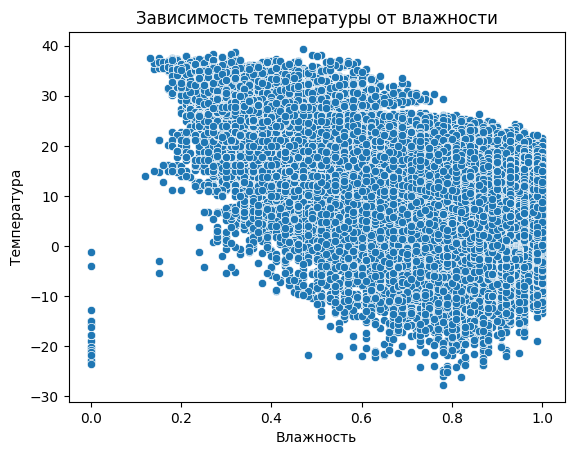

In [8]:
# Строим диаграмму рассеяния для зависимости температуры от влажности
sns.scatterplot(x='Hum', y='Temp', data=df)
plt.xlabel('Влажность')
plt.ylabel('Температура')
plt.title('Зависимость температуры от влажности')
plt.show()

In [9]:
lr = LinearRegression()
# Выделяем признаки и целевую переменную
X = df[['Hum']]
y = df['Temp']
# Разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Обучаем модель на обучающей выборке
lr.fit(X_train, y_train)

# Выводим коэффициент детерминации для обучающей и тестовой выборки
print('R^2 на обучающей выборке:', lr.score(X_train, y_train))
print('R^2 на тестовой выборке:', lr.score(X_test, y_test))
# Выводим уравнение регрессии
print('Уравнение регрессии: y = {:.2f} + {:.2f}x'.format(lr.intercept_, lr.coef_[0]))


R^2 на обучающей выборке: 0.3641842095742762
R^2 на тестовой выборке: 0.3587532329296208
Уравнение регрессии: y = 35.11 + -33.00x


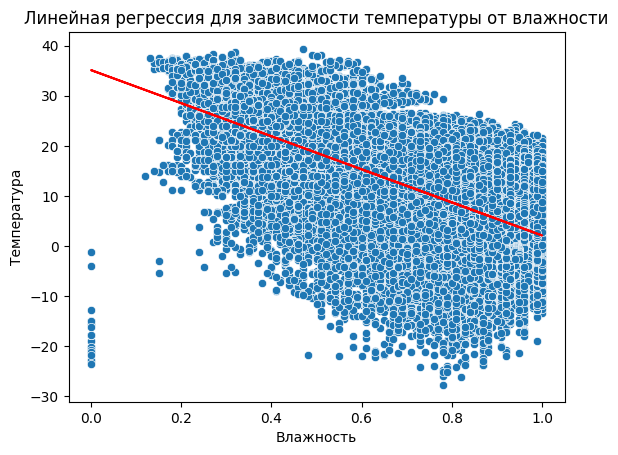

In [10]:
# Строим диаграмму рассеяния с линией регрессии
sns.scatterplot(x='Hum', y='Temp', data=df)
plt.plot(X, lr.predict(X), color='red')
plt.xlabel('Влажность')
plt.ylabel('Температура')
plt.title('Линейная регрессия для зависимости температуры от влажности')
plt.show()

In [16]:
# Добавляем параметр скорости ветра
X = df[['Hum', 'Wind']]
y = df['Temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr.fit(X_train, y_train)

print('R^2 на обучающей выборке:', lr.score(X_train, y_train))
print('R^2 на тестовой выборке:', lr.score(X_test, y_test))
print('Уравнение регрессии: y = {:.2f} + {:.2f}x1 + {:.2f}x2'.format(lr.intercept_, lr.coef_[0], lr.coef_[1]))


R^2 на обучающей выборке: 0.40305654953535575
R^2 на тестовой выборке: 0.3978063026358415
Уравнение регрессии: y = 40.30 + -35.46x1 + -0.31x2


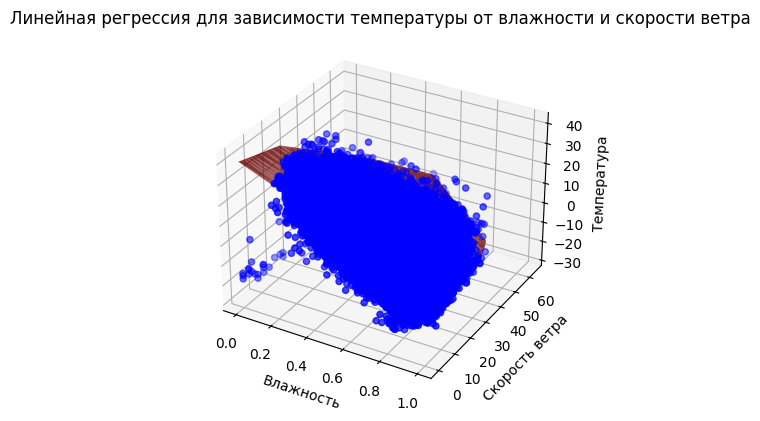

In [15]:
# Визуализируем модель в трехмерном пространстве
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Hum'], X['Wind'], y, c='blue')
ax.plot_trisurf(X['Hum'], X['Wind'], lr.predict(X), color='red', alpha=0.8)
ax.set_xlabel('Влажность')
ax.set_ylabel('Скорость ветра')
ax.set_zlabel('Температура')
ax.set_title('Линейная регрессия для зависимости температуры от влажности и скорости ветра')
plt.show()